# Students’ Academic Performance
The University of Jordan is trying to analyze how student studying and see if there's a correlation between how well they're studying and their performance.Data with an educational data set which was collected from Learning Management System. 


**Perform the Analysis:**

1. Students allocation by class.
2. Students allocation by country.
3. Students performance (compare classes?)
4. Who better performing, boys or girls?
5. Dependence in students performance and attendance.
6. Dependence in attendance and parent’s satisfaction.
7. How students activity influences performance.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Students_Data.csv')

In [3]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


The Dataset contains 480 rows and 17 columns

In [4]:
data.shape

(480, 17)

# Data Cleaning
Data contains few mistakes which must be fixed before analysis.

In [5]:
# Re-name the columns.
data.columns = ["Gender", "Nationality", "PlaceOfBirth", "StageID", "SectionID", "GradeID", "Topic", "Semester", "Relation", "RaisedHands", "VisitedResources", "AnnouncementsView", "Discussion", "ParentAnsweringSurvey", "ParentSchoolSatisfaction", "StudentAbsenceDays", "Class"]

In [6]:
data.head()

,Gender,Nationality,PlaceOfBirth,StageID,SectionID,GradeID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
# Get distinct/unique values of Nationality
set(data["Nationality"])

{'Egypt',
 'Iran',
 'Iraq',
 'Jordan',
 'KW',
 'Lybia',
 'Morocco',
 'Palestine',
 'SaudiArabia',
 'Syria',
 'Tunis',
 'USA',
 'lebanon',
 'venzuela'}

There are mistakes in 4 country names. Pass a dictionary of replacement values into the Series **replace method**

In [8]:
data["Nationality"] = data["Nationality"].replace({"KW":"Kuwait", "SaudiArabia":"Saudi Arabia", "lebanon":"Lebanon","venzuela":"Venezuela"})

In [9]:
set(data["Nationality"])

{'Egypt',
 'Iran',
 'Iraq',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Lybia',
 'Morocco',
 'Palestine',
 'Saudi Arabia',
 'Syria',
 'Tunis',
 'USA',
 'Venezuela'}

In [10]:
set(data["StageID"])

{'HighSchool', 'MiddleSchool', 'lowerlevel'}

Change textcase of StageID column value: 'lowerlevel'

In [11]:
data["StageID"] = data["StageID"].replace("lowerlevel","LowerLevel")

In [12]:
set(data["Class"])

{'H', 'L', 'M'}

Rename Class in L "LowLevel", M "MiddleLevel, H “HighLevel"

In [13]:
data['Class'] = data['Class'].replace({"L":"LowLevel","M":"MiddleLevel","H":"HighLevel"})

_____

## Allocation by Class

IT has the highest number of students.

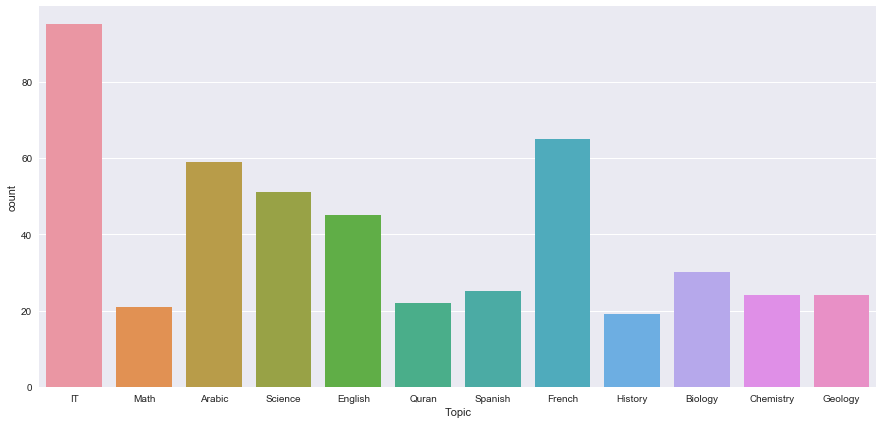

In [21]:
plt.figure(figsize = (15,7))
sns.countplot(x="Topic", data=data)
plt.show()

## Allocation by Country

 Most students are from Kuwait and Jordan.

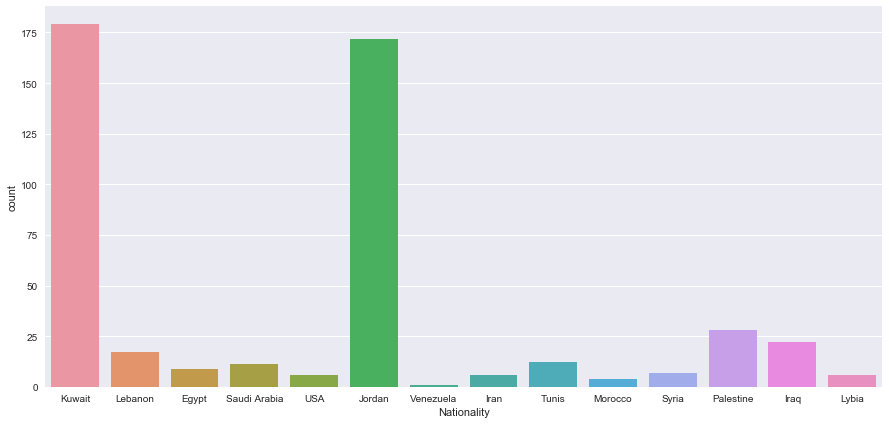

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x='Nationality',data=data)
plt.show()

## Student's Performance

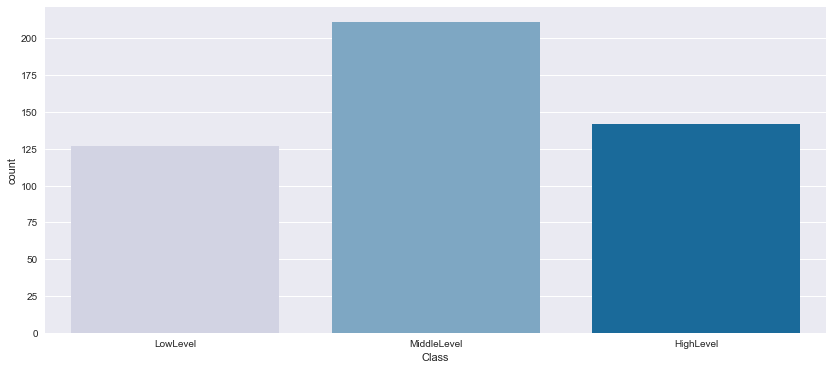

In [25]:
plt.figure(figsize = (14,6))
sns.countplot(x="Class", data=data, palette='PuBu', order=['LowLevel','MiddleLevel','HighLevel'])
plt.show()

## Boys vs Girls

Most of the girls are getting higher grades.

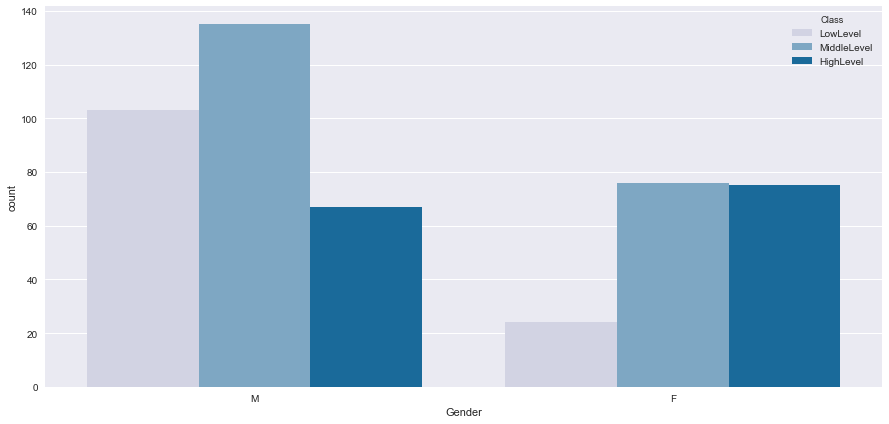

In [17]:
plt.figure(figsize = (15,7))
sns.countplot(x="Gender", data=data, palette='PuBu', hue='Class', hue_order = ['LowLevel','MiddleLevel','HighLevel'])
plt.show()

## Performance vs Attendance
Students that most attend the school are performing well and having better grades than those who do not attending the class.But there are students who don't attend classes and still performing well and even among those students who attend most classes are not getting good grades and that is show as an OUTLIER. 

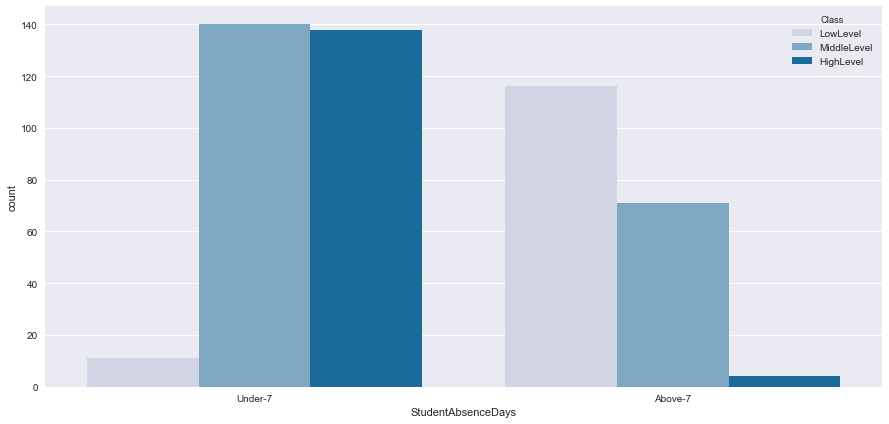

In [18]:
plt.figure(figsize = (15,7))
sns.countplot(x="StudentAbsenceDays", data=data, palette='PuBu', hue='Class', hue_order=['LowLevel','MiddleLevel','HighLevel']) 
plt.show()

## Performance vs Class
High performing student most raise hands. 

**Raised hand: How many times the student raises his/her hand on classroom.**

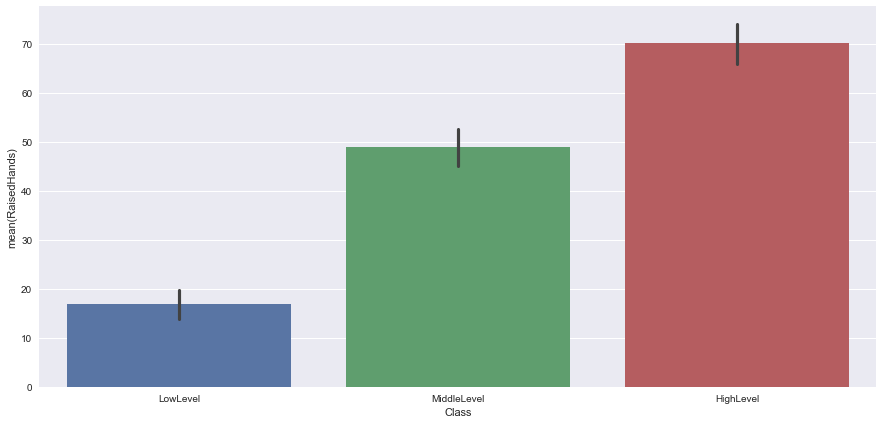

In [19]:
plt.figure(figsize = (15,7))
sns.barplot(x='Class', y='RaisedHands', data=data, order=['LowLevel','MiddleLevel','HighLevel']) 
plt.show()

## Attendance vs Parents Satisfaction
Students with less than 7 days absences are good but more than 7 days are bad.

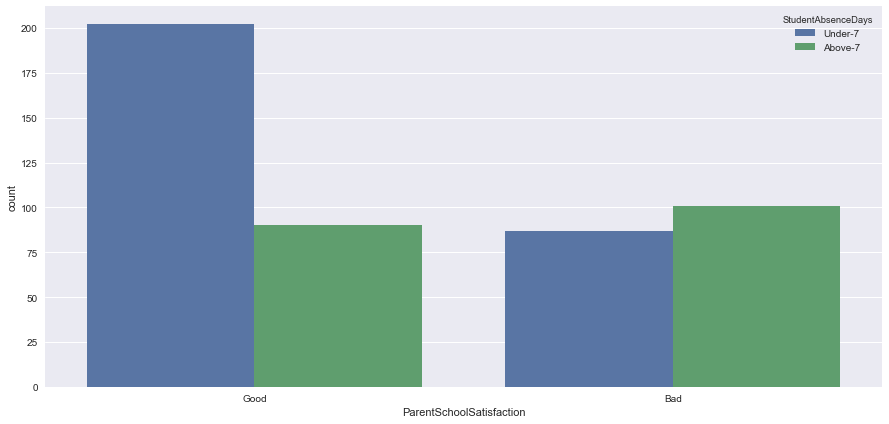

In [20]:
plt.figure(figsize = (15,7))
sns.countplot(x="ParentSchoolSatisfaction", data=data, hue='StudentAbsenceDays')
plt.show()